# **On génére les actifs :**



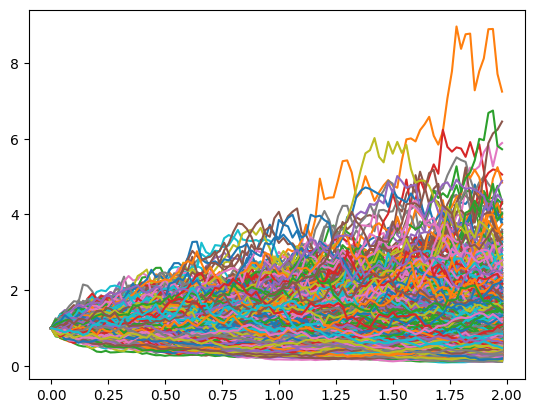

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# Créé par CYTech Student, le 25/11/2022 en Python 3.7
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

n=100
T=2
d=T/n
Nmc=1000
r=0.1
sigma0=0.5
S0=1
rf=0.001

#cette fonction va permettre de simuler Nmc actifs
def St():
    S=[]
    for i in range(Nmc):
        s=[S0]
        for j in range(1,n):
            s.append(s[j-1]*math.exp((r-(sigma0**2)/2)*d+sigma0*math.sqrt(d)*np.random.randn(1)[0]))
        S.append(s)
    return S

Sfixe=[S0]
for i in range(1,n):
    Sfixe.append(Sfixe[i-1]+Sfixe[i-1]*rf)

S=[Sfixe]
S=S+St()

def Afficher():
    Temps=[i*d for i in range(n)]
    for i in range(Nmc):
        plt.plot(Temps,S[i])
    plt.show()

# on calcule l'espérance
Esp=[sum(s)/len(s) for s in S]

#on calcule la variance
var=[]
for i in range(len(S)):
    somme=0
    for j in range(n):
        somme+= (Esp[i]-S[i][j])**2
    var.append(somme/(n-1))


#on calcule les covariances
cov=[]
for i in range(Nmc+1):
    ligne=[]
    for k in range(Nmc+1):
        c=0
        for j in range(n):
            c+=(S[i][j]-Esp[i])*(S[k][j]-Esp[k])
        ligne.append(c/(n-1))
    cov.append(ligne)

Afficher()

print(f"Esp = {Esp}" )
print(f"Cov = {cov}")
print(f"Var = {var}")

# **On cherche une distribution optimal (avec la présence d'un actif fixe) :**

In [12]:
R0=0.1
NbActifs = 50

x0=[0 for i in range(NbActifs)]
cons=({'type':'eq','fun': lambda x: sum(x)-1},
          {'type':'ineq','fun': lambda x: sum([x[i]*Esp[i] for i in range(1,NbActifs)])+(x[0]*rf)-R0},
          {'type':'ineq','fun': lambda x: x})

#on minimise le risque lié au portefeuille d'actifs (S0,...,Sn)

def risque(x):
    s=0
    for i in range(len(x)):
        for j in range(len(x)):
            s+=x[i]*x[j]*cov[i][j]
    return s

def OptiRisque_ActifFixe():
#on défini les contraintes : sum(x)=1 et Xi>=0 pour tout i
    x0=[0 for i in range(NbActifs)]
    cons=({'type':'eq','fun': lambda x: sum(x)-1},
          {'type':'ineq','fun': lambda x: sum([x[i]*Esp[i] for i in range(1,NbActifs)])+(x[0]*rf)-R0},
          {'type':'ineq','fun': lambda x: x})
#on minimise la fonction risque en tenant compte des contraintes
    res = scipy.optimize.minimize(risque, x0, method='SLSQP',bounds=None, constraints=cons)

    print("Voici la dstribution optimal :")
#si on trouve un résultat alors on renvoie celui-ci
    L=[]
    if res.success==True:
        for i in range(len(res.x)):
            L.append(round((res.x[i]*100),2))
            print('X'+str(i)+" = "+str(L[i]))
        print(sum([L[i]*Esp[i] for i in range(NbActifs)]))
    else:
        print("Il n'y a pas de solution")
    return L

OptiRisque_ActifFixe()

Voici la dstribution optimal :
X0 = 4.39
X1 = 0.62
X2 = 1.05
X3 = 0.74
X4 = 1.27
X5 = 0.06
X6 = 1.22
X7 = 1.53
X8 = 3.32
X9 = 0.62
X10 = 1.65
X11 = 4.22
X12 = 2.34
X13 = 0.04
X14 = 0.0
X15 = 1.43
X16 = 1.56
X17 = 0.95
X18 = 0.64
X19 = 0.81
X20 = 1.26
X21 = 3.8
X22 = 1.22
X23 = 3.93
X24 = 3.44
X25 = 3.28
X26 = -0.0
X27 = 2.19
X28 = 1.53
X29 = 1.76
X30 = 2.69
X31 = 4.37
X32 = 2.51
X33 = 1.41
X34 = 1.65
X35 = 0.95
X36 = 0.49
X37 = 2.6
X38 = 2.06
X39 = 1.96
X40 = 2.17
X41 = 2.96
X42 = 3.17
X43 = 2.15
X44 = 0.81
X45 = 2.09
X46 = 4.13
X47 = 2.52
X48 = 1.37
X49 = 7.06
98.61964302426107


[4.39,
 0.62,
 1.05,
 0.74,
 1.27,
 0.06,
 1.22,
 1.53,
 3.32,
 0.62,
 1.65,
 4.22,
 2.34,
 0.04,
 0.0,
 1.43,
 1.56,
 0.95,
 0.64,
 0.81,
 1.26,
 3.8,
 1.22,
 3.93,
 3.44,
 3.28,
 -0.0,
 2.19,
 1.53,
 1.76,
 2.69,
 4.37,
 2.51,
 1.41,
 1.65,
 0.95,
 0.49,
 2.6,
 2.06,
 1.96,
 2.17,
 2.96,
 3.17,
 2.15,
 0.81,
 2.09,
 4.13,
 2.52,
 1.37,
 7.06]

# **Distribution optimale (Sharp Ratio)**

In [13]:

NbActifs = 50
x0=[0.5 for i in range(NbActifs)]
cons=[{'type':'eq','fun': lambda x: sum(x)-1},# contraintes pour avoir la sommes des Xi = 1
          {'type':'ineq','fun': lambda x: x}]

#on minimise le risque lié au portefeuille d'actifs (S0,...,Sn)
def Gains(x):
    return sum([x[i]*Esp[i] for i in range(1,len(x))])-rf

def risque(x):
    s=0
    for i in range(1,NbActifs):
        for j in range(1,NbActifs):
            s+=x[i]*x[j]*cov[i][j]
    return s

def Sharp_Ratio(x):
    return -Gains(x)/math.sqrt(risque(x))

#on défini les contraintes : sum(x)=1 et Xi>=0 pour tout i
def OptiSharpRatio():
    x0=[0.5 for i in range(NbActifs)]
    cons=[{'type':'eq','fun': lambda x: sum(x)-1},# contraintes pour avoir la sommes des Xi = 1
          {'type':'ineq','fun': lambda x: x}] #contraintes pour rendre les Xi positifs

#on minimise la fonction risque en tenant compte des contraintes
    res = scipy.optimize.minimize(Sharp_Ratio, x0, method='SLSQP',bounds=None, constraints=cons,tol=0.01)

    #si on trouve un résultat alors on renvoie celui-ci
    L=[]
    if res.success==True:
        for i in range(len(res.x)):
            L.append(round((res.x[i]*100),2))
            print('X'+str(i)+" = "+str(L[i]))
        print(sum([L[i]*Esp[i] for i in range(NbActifs)]))
    else:
        print("Il n'y a pas de solution")
    return L

OptiSharpRatio()

X0 = 0.0
X1 = 0.0
X2 = 0.0
X3 = 1.35
X4 = 0.81
X5 = -0.0
X6 = 0.32
X7 = 0.0
X8 = 4.2
X9 = 2.05
X10 = 2.15
X11 = 5.09
X12 = 2.43
X13 = 0.0
X14 = 1.32
X15 = 1.42
X16 = 2.2
X17 = 1.31
X18 = 0.0
X19 = 0.82
X20 = 2.23
X21 = 1.78
X22 = 1.41
X23 = 2.13
X24 = 3.21
X25 = 3.33
X26 = 0.0
X27 = 2.14
X28 = 0.0
X29 = 2.72
X30 = 2.84
X31 = 3.8
X32 = 1.29
X33 = 1.43
X34 = 0.94
X35 = 1.37
X36 = 1.03
X37 = 1.85
X38 = 1.39
X39 = 2.52
X40 = 1.05
X41 = 4.81
X42 = 5.45
X43 = 2.72
X44 = 1.43
X45 = 3.57
X46 = 5.65
X47 = 2.16
X48 = 1.53
X49 = 8.74
99.51406844511328


[0.0,
 0.0,
 0.0,
 1.35,
 0.81,
 -0.0,
 0.32,
 0.0,
 4.2,
 2.05,
 2.15,
 5.09,
 2.43,
 0.0,
 1.32,
 1.42,
 2.2,
 1.31,
 0.0,
 0.82,
 2.23,
 1.78,
 1.41,
 2.13,
 3.21,
 3.33,
 0.0,
 2.14,
 0.0,
 2.72,
 2.84,
 3.8,
 1.29,
 1.43,
 0.94,
 1.37,
 1.03,
 1.85,
 1.39,
 2.52,
 1.05,
 4.81,
 5.45,
 2.72,
 1.43,
 3.57,
 5.65,
 2.16,
 1.53,
 8.74]

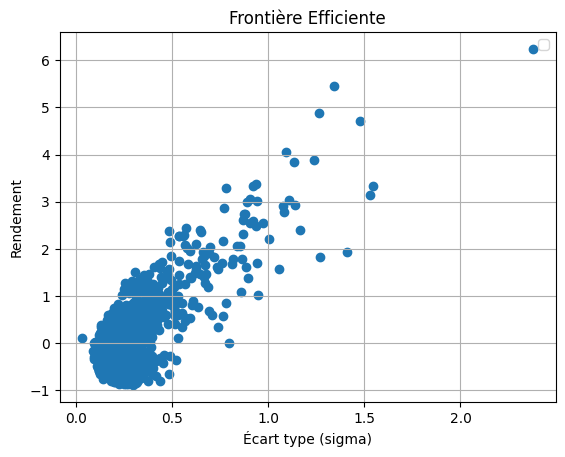

In [16]:

rendements = [(S[i][-1] - S0) / S0 for i in range(Nmc+1)]
ecart_types = np.sqrt(var)

plt.scatter(ecart_types, rendements)
plt.xlabel('Écart type (sigma)')
plt.ylabel('Rendement')
plt.title('Frontière Efficiente')
plt.grid(True)


plt.legend()
plt.show()